# FINAL PROJECT
## Joanne Boysen


**COMMENTS**
* 70/70. This turned out to be a surprisingly difficult system to control. But your analysis was quite reasonable.

In the final project, you will create a closed loop system for an SBML model.
Start by selecting a model from the [BioModels Curated branch](https://www.ebi.ac.uk/biomodels/search?query=*%3A*+AND+curationstatus%3A%22Manually+curated%22&domain=biomodels).)
You don't have to restrict yourself to thoses models, but you'll find that the curated BioModels are fairly easy to reproduce.) You'll find a paper associated with each model.

1. **Specify the requirements for the control system.** (10 pt) After reading the paper for the model, propose a chemical species for the control output
and an operating point for it. You should also indicate the desired
operating characteristics such as settling time and overshoot.
Justify this in terms of the potential value of controlling
the chemical species and why the particular operating point makes sense.
1. **Determine the control input you will use**. (10 pt) This will require evaluating the DC gain of
of candidate control inputs on chemical species that are the control outputs.
1. **Design the control system**. (15 pt) You will specify a controller and possibly a filter.
You will select the parameters of the elements based on the poles and DC gains implied by
the operating characteristics in (1).
1. **Evaluate your design.** (25 pt) You will construct a simulation testbed in which the
SBML model is regulated by your control architecture.
You should evaluate the effects of disturbances and/or noise.
1. **Discuss trade-offs.** (10 pt) Discuss trade-offs in the selection of parameter values in your design.
This should consider the impact of parameter values on the closed loop transfer functions.

You will receive 5 extra points if you use LaTex for your mathematical analyses.

**All students will present their projects during the last week of class.**
This is an ungraded presentation intended to give you early feedback on your work.

# Preliminaries

In [1]:
!pip install -q controlSBML
import control
import controlSBML as ctl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te
import scipy

     |████████████████████████████████| 398 kB 10.3 MB/s 
     |████████████████████████████████| 8.8 MB 7.1 MB/s 
     |████████████████████████████████| 154 kB 43.9 MB/s 
     |████████████████████████████████| 485 kB 42.0 MB/s 
     |████████████████████████████████| 6.8 MB 50.9 MB/s 
     |████████████████████████████████| 121 kB 40.8 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 342 kB 71.3 MB/s 
     |████████████████████████████████| 428 kB 62.1 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 561 kB 71.6 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 131 kB 28.8 MB/s 
     |████████████████████████████████| 133 kB 61.9 MB/s 
     |████████████████████████████████| 106 kB 60.9 MB/s 
     |████████████████████████████████| 250 kB 71.0 MB/s 
     |████████████████████████████████| 103 kB 68.8 MB/s 
     |███████████████

# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Closed Loop Transfer Functions

<img src="https://github.com/joseph-hellerstein/advanced-controls-lectures/blob/main/Lecture_13_14-Closed-Loop-Systems/Closed-Loop-System.png?raw=true"
     alt="Markdown Monster icon" width=600pt
     style="float: left; margin-right: 10px;" />

**Transfer Functions**
\begin{eqnarray}
H_{RY}(s) & = & \frac{Y(s)}{R(s)} & = & \frac{C(s) G(s)}{1 + C(s) G(s) F(s)} \\
H_{RE}(s) & = & \frac{E(s)}{R(s)} & = & \frac{1}{1 + C(s) G(s) F(s)} \\
H_{NY}(s) & = & \frac{Y(s)}{N(s)} & = & -\frac{ F(s)}{1 + C(s) G(s) F(s)} \\
H_{DY}(s) & = & \frac{Y(s)}{D(s)} & = & \frac{ C(s)}{1 + C(s) G(s) F(s)} \\
\end{eqnarray}

# BioModels Sharp2013 - Lipopolysaccharide induced NFkB activation

A computational model of lipopolysaccharide-induced nuclear factor kappa B activation: a key signalling pathway in infection-induced preterm labour [1].

In [2]:
BIOMD = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000489.2?filename=BIOMD0000000489_url.xml"
CTLSB = ctl.ControlSBML(BIOMD)
print(CTLSB.antimony)

// Created by libAntimony v2.13.1
function function_2(k, Enzyme, Substrate, Km)
  k*Enzyme*Substrate/(Km + Substrate);
end

function_2 is "Modified Michaelis Menten"

function function_1(k1, Enzyme, Substrate1, Substrate2, k2, Product)
  k1*Enzyme*Substrate1*Substrate2 - k2*Product;
end

function_1 is "Modified Mass Action"


model *MODEL1303230000()

  // Compartments and Species:
  compartment compartment_1;
  species $species_1 in compartment_1, $species_2 in compartment_1, $species_3 in compartment_1;
  species $species_4 in compartment_1, species_5 in compartment_1, $species_6 in compartment_1;
  species $species_7 in compartment_1, $species_8 in compartment_1, species_9 in compartment_1;
  species $species_10 in compartment_1, species_11 in compartment_1, $species_12 in compartment_1;
  species species_13 in compartment_1, species_14 in compartment_1, species_15 in compartment_1;
  species $species_16 in compartment_1, $species_17 in compartment_1, $species_18 in compartment_1;
 

In [3]:
TIMES = ctl.makeSimulationTimes(0, 15, 200)

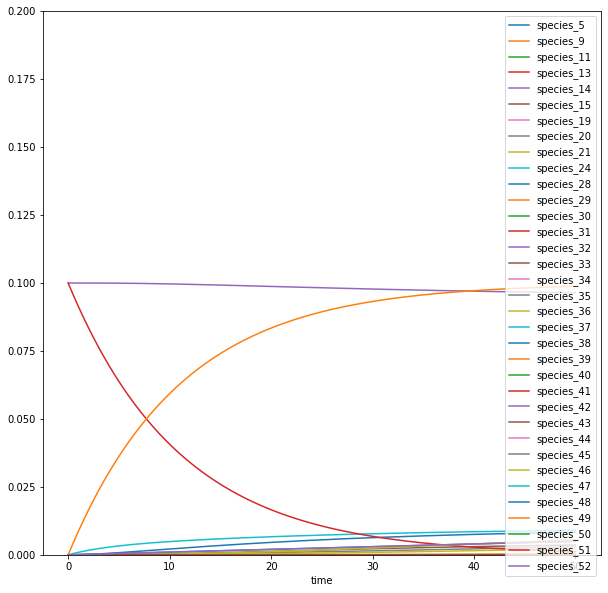

In [4]:
CTLSB.plotTrueModel(figsize=(10,10), end_time=50, ylim=[0,0.2])

# Helper Functions

In [5]:
def plotTFs(Gs, kp=0, ki=0, kd=0, times=TIMES, ylim=None, title=None, is_plot=True):
    """
    Constructs the transfer functions for the proportional controller, and filter.
    Calculates the transfer functions HRYs, HREs, HNYs, HDYs and plots them.
    
    Parameters
    ----------
    Gs: control.TransferFunction
    kp: float
    ki: float
    kd: float
    times: list-float
    ylim: (float, float)
        limits of y-values
    title: str
    
    Returns
    -------
    dct
        key: name of transfer function
        value: control.TransferFunction
    """
    Cs = control.TransferFunction([kp], [1]) + control.TransferFunction([ki], [1, 0])  \
        + control.TransferFunction([kd, 0], [1])
    Fs = 1
    denom = 1 + Cs*Gs*Fs
    # Construct the transfer functions
    tf_dct = {
        "HRYs": Cs*Gs/denom,
        "HREs": 1/denom,
        "HNYs": -Fs/denom,
        "HDYs": Cs/denom,
    }
    # Construct the plots
    _, ax = plt.subplots(1)
    for tf in tf_dct.values():
        result = control.forced_response(tf, T=times, U=1)
        plt.plot(result.t.flatten(), result.y.flatten())
    # Refine plots
    plt.legend(list(tf_dct.keys()))
    xmax = max(result.t.flatten())
    plt.plot([0, xmax], [0, 0], linestyle="--", color="black")
    plt.plot([0, xmax], [1, 1], linestyle="--", color="grey")
    plt.ylim([-5, 5])
    title = "kp=%2.2f ki=%2.2f kd=%2.2f" % (kp, ki, kd)
    plt.title(title)
    if not is_plot:
        plt.close()
    return tf_dct
    
# Tests
Gs = control.TransferFunction([2], [1, 3])
dct = plotTFs(Gs, kp=10, ylim=[0, 3], title="Example", is_plot=False)
assert(len(dct) == 4)
assert("TransferFunction" in str(type(dct["HRYs"])))
print("OK!")

OK!


OK!


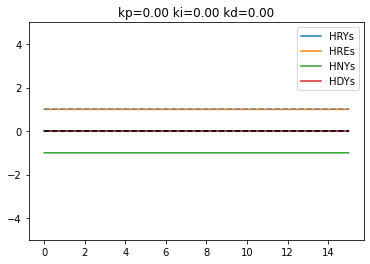

In [6]:
def makeHRY(model, tf, input_name, output_name, time=0, kp=0, ki=0, kd=0):
    """
    Calculates the transfer function from the reference input to the output.
    
    Parameters
    ----------
    model: str
    tf: string
      transfer function name that you want returned
    input_name: str
    output_name: str
    time: float
    kp: float
    ki: float
    kd: float
    
    Returns
    -------
    control.TransferFunction
    """
    ctlsb = ctl.ControlSBML(model, input_names=[input_name], output_names=[output_name])
    Gs = ctlsb.makeTransferFunction(time=time)
    dct = plotTFs(Gs, kp=kp, ki=ki, kd=kd, is_plot=True)
    return dct[tf]
    
    
# TESTS
tf = makeHRY(BIOMD, "HRYs","species_31", "species_39", time=0,kp=0)
assert(tf.dcgain() == 0)
print("OK!")

# 1. Specify Requirements
After reading the paper for the model, propose a chemical species for the control output and an operating point for it. You should also indicate the desired operating characteristics such as settling time and overshoot. Justify this in terms of the potential value of controlling the chemical species and why the particular operating point makes sense.

Preterm births are a significant cause of neonatal morbitity and there is little understanding of the molecular mechanisms responsible for initiating labor at aterm. Here Sharp et al. have developed a computational model of lipopolysaccharide-induced nucear factor kappa B activation signaling pathway. **Thus my control output species is the nucleus of nuclear facotr NF-kappa-B p105 subunit (species_39). ** My ideal operating point will occur at 10 seconds and when the concentration of my output chemical species is 0.1 because that is the steady state value that it reaches.

I would like my system to settle in 5 seconds with a very small overshoot of +/- 0.025. The signaling pathways regulating pregnancies are very intiricate and sensative to change so a fast settling time and small overshoot are imperative to successully modeling this system. 

# 2. Determine the Control Input

Given that my control output is nucleus of nuclear factor NF-kappa-B p105 subunit (species_39) (NFkB(nuc)), I identified three proming control inputs and evaluated them at multiple time points, including my operating point at 10 seconds. 

Species_34 returned DC Gain values that were very high or negative.

In [7]:
SISO = ctl.SISOClosedLoopSystem(CTLSB)
dct = SISO.evaluateControllability([5, 10, 25, 40], input_names=['species_34'], output_names=['species_39'])
for time in dct.keys():
    print("\n%d" % time)
    print(dct[time])


5
              species_39
species_34  3.531529e+07

10
             species_39
species_34 -8704.509063

25
              species_39
species_34  35324.193396

40
              species_39
species_34 -24296.137803


Species 37 also returned very high and/or negative values, so I chose to investigate the controllability of another species.

In [8]:
SISO = ctl.SISOClosedLoopSystem(CTLSB)
dct = SISO.evaluateControllability([5, 10, 25, 40], input_names=['species_37'], output_names=['species_39'])
for time in dct.keys():
    print("\n%d" % time)
    print(dct[time])


5
               species_39
species_37 -109747.034164

10
             species_39
species_37  2036.080292

25
               species_39
species_37  183969.787329

40
             species_39
species_37  2105.073494


Species 31 proved to be the most controllable as there were positive DC gain values that were not too large. These values would allow me to carefully finetune my control system to successfully attain a fast settling time and limit overshoot.

In [9]:
SISO = ctl.SISOClosedLoopSystem(CTLSB)
dct = SISO.evaluateControllability([5, 8, 10, 15, 25, 40], input_names=['species_31'], output_names=['species_39'])
for time in dct.keys():
    print("\n%d" % time)
    print(dct[time])


5
            species_39
species_31  -60.326649

8
            species_39
species_31   38.499885

10
            species_39
species_31    0.674106

15
            species_39
species_31   -4.312711

25
            species_39
species_31    -6.64863

40
            species_39
species_31   -1.499508


Here I produce the transfer function for the selected control input and output at 10 seconds.

In [10]:
INPUT = "species_31"
INPUT_NAME = 'NFkB'
OUTPUT = 'species_39'
OUTPUT_NAME = "NFkB(nuc)"

In [11]:
time = 10
ctlsb = ctl.ControlSBML(BIOMD, input_names=[INPUT], output_names=[OUTPUT])
Gs = ctlsb.makeTransferFunction(time=time)
Gs

TransferFunction(array([ 9.00000000e-002,  9.21817196e-002,  4.01025388e-002,
        9.95636441e-003,  1.61026525e-003,  1.83161620e-004,
        1.53884929e-005,  9.86918825e-007,  4.94200794e-008,
        1.96231142e-009,  6.24130113e-011,  1.59952238e-012,
        3.31058589e-014,  5.52773666e-016,  7.41257024e-018,
        7.91772909e-020,  6.65208872e-022,  4.31648143e-024,
        2.10837139e-026,  7.47586309e-029,  1.82800728e-031,
        2.87104947e-034,  2.67011159e-037,  1.46133442e-040,
        4.83761252e-044,  9.88582516e-048,  1.25329957e-051,
        9.74708123e-056,  4.47528343e-060,  1.10369157e-064,
        1.11984769e-069, -4.06496608e-087,  8.82545217e-105,
       -2.01145500e-123]), array([ 1.00000000e+000,  1.02432133e+000,  4.45665705e-001,
        1.10661918e-001,  1.79006863e-002,  2.03656052e-003,
        1.71146092e-004,  1.09794497e-005,  5.49990174e-007,
        2.18474818e-008,  6.95228950e-010,  1.78283205e-011,
        3.69280309e-013,  6.17186928e-015

**COMMENTS**
* This transfer function has some VERY small terms, like $10^{-123}$. You should be very suspicious of this.

Poles for transfer function displayed above:

In [12]:
poles = Gs.poles()
poles

array([-2.61818634e-01+0.00000000e+00j, -2.61790440e-01+0.00000000e+00j,
       -1.00638661e-01+0.00000000e+00j, -6.61827824e-02+1.31863816e-02j,
       -6.61827824e-02-1.31863816e-02j, -5.09390966e-02+2.98258647e-02j,
       -5.09390966e-02-2.98258647e-02j, -3.28378407e-02+3.50740928e-02j,
       -3.28378407e-02-3.50740928e-02j, -4.51837629e-02+0.00000000e+00j,
       -1.66804272e-02+3.22796883e-02j, -1.66804272e-02-3.22796883e-02j,
       -4.56491789e-03+2.39346405e-02j, -4.56491789e-03-2.39346405e-02j,
        1.09639604e-03+1.26454624e-02j,  1.09639604e-03-1.26454624e-02j,
       -1.08083403e-02+0.00000000e+00j,  3.72490364e-04+4.63293768e-03j,
        3.72490364e-04-4.63293768e-03j, -2.22030157e-03+0.00000000e+00j,
       -1.25960962e-03+0.00000000e+00j, -2.19047339e-04+7.22766178e-04j,
       -2.19047339e-04-7.22766178e-04j, -2.73614064e-05+3.66033736e-04j,
       -2.73614064e-05-3.66033736e-04j, -1.79748733e-04+8.58070070e-05j,
       -1.79748733e-04-8.58070070e-05j, -9.75925537

Most of these poles are negatvie, which is encouraging. However, there are some positive poles and many have imaginary parts. This leaves room for improvement in our control system design.

# 3. Design the Control System

You will specify a controller and possibly a filter. You will select the parameters of the elements based on the poles and DC gains implied by the operating characteristics in (1)

In [13]:
def evaluateClosedLoopSystem(ctlsb, is_plot=True, cl_opts={}, plt_opts={}, sim_opts={},
                method=ctl.SISOClosedLoopSystem.makePIDClosedLoopSystem):
    """
    Evaluate a PID controller by plotting step response.
    
    Parameters
    ----------
    cl_opts: dict
        Options for the closed loop system. See parameters for SISOClosedLoopSystem.makePIDClosedLoopSystem
    plt_opts: dict
        Options for plottling. See ctl.plotOneTs
    sim_opts: dict
        Options for simulation
            start_time: float
            end_time: float
            points_per_time: int
    """
    siso = ctl.SISOClosedLoopSystem(ctlsb)
    # Handle the method to call
    extracted_method = method.__qualname__.split(".")[1]
    stmt = "siso.%s(**cl_opts)" % extracted_method
    eval(stmt)
    ts = siso.makeStepResponse(**sim_opts)
    titles = ["%s=%s" % (k, v) for k, v in cl_opts.items()]
    title = ", ".join(titles)
    if is_plot:
        ctl.plotOneTS(ts, figsize=(5,5), title=title, **plt_opts)
    return ts

# Tests
cl_opts=dict(kp=1, ki=0, kd=0, kf=0, noise_amp=0, noise_frq=0)
sim_opts = dict(end_time=5)
ctlsb = ctl.ControlSBML(BIOMD, input_names=['species_31'], output_names=["species_39"])
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=False)
assert("Timeseries" in str(type(ts)))
print("OK!")

OK!


In [14]:
def evaluatePoles(model=BIOMD, op_time=10, kp=0, ki=0, kd=0):
  '''
  Evaluates the poles of the closed loop system transfer function for given
  PID constants and a filter TF of 1.

  Parameters
  ----------
  model: ctl.ControlSBML
  op_time: float
    time of operating point
  kp: float
  ki: float
  kd: float

  Results
  -------
  poles: array of floats
  '''

  Gs = ctlsb.makeTransferFunction(time=op_time)
  Cs = control.TransferFunction([kp],[1]) + control.TransferFunction([ki], [1,0]) + control.TransferFunction([kd, 0],[1])

  HRY = (Gs*Cs) / (1 + Gs*Cs)
  return HRY.poles()

# TEST
poles = evaluatePoles(BIOMD, 10, 1, 1, 1)
assert(len(poles) > 0)
print('OK!')

OK!


I experimented with many parameter values, and found that the system was very susceptible to changes in ki, and that small values were best.

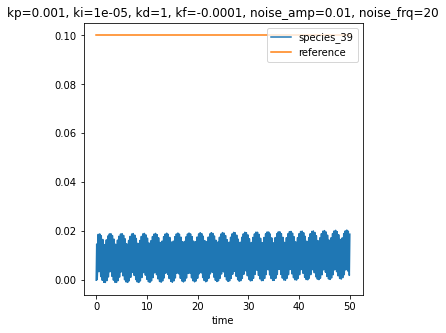

array([-3.62840944e-01+0.00000000e+00j, -3.55369159e-01+5.23953505e-02j,
       -3.55369159e-01-5.23953505e-02j, -3.33682596e-01+1.03214535e-01j,
       -3.33682596e-01-1.03214535e-01j, -2.99884017e-01+1.50365471e-01j,
       -2.99884017e-01-1.50365471e-01j, -2.56886252e-01+1.91187653e-01j,
       -2.56886252e-01-1.91187653e-01j, -2.07683433e-01+2.23484742e-01j,
       -2.07683433e-01-2.23484742e-01j, -1.54572040e-01+2.46367615e-01j,
       -1.54572040e-01-2.46367615e-01j, -9.86646425e-02+2.59157406e-01j,
       -9.86646425e-02-2.59157406e-01j, -4.13636752e-02+2.60043495e-01j,
       -4.13636752e-02-2.60043495e-01j,  1.38820387e-02+2.46372680e-01j,
        1.38820387e-02-2.46372680e-01j,  5.09647527e-02+2.17353988e-01j,
        5.09647527e-02-2.17353988e-01j,  8.53901228e-02+2.11398723e-01j,
        8.53901228e-02-2.11398723e-01j,  1.34722248e-01+1.84105541e-01j,
        1.34722248e-01-1.84105541e-01j,  1.73962960e-01+1.41496730e-01j,
        1.73962960e-01-1.41496730e-01j,  2.01202709

In [15]:
cl_opts=dict(kp=.001, ki=.00001, kd=1, kf=-.0001, noise_amp=0.01, noise_frq=20)
sim_opts = dict(end_time=50, step_size=.1)
ctlsb = ctl.ControlSBML(BIOMD, input_names=[INPUT], output_names=[OUTPUT])
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
evaluatePoles(BIOMD, 10, 0.001, 0.00001, 1)

To improve the above control system, I decreased ki by several orders of magnitude. While this made it nearly impossible to attenuate noise, it was the only that that successfully allowed the output to converge to the intended reference of 0.1. Furthermore, I adjusted the kd value many times and this combination of parameters allowed me to identify a control system that settled in less than 5 seconds and has very little overshoot. 

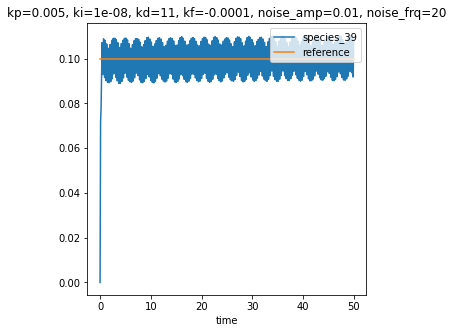

array([-3.56326345e-01+0.00000000e+00j, -3.48046886e-01+5.44198058e-02j,
       -3.48046886e-01-5.44198058e-02j, -3.24458471e-01+1.07234041e-01j,
       -3.24458471e-01-1.07234041e-01j, -2.88654231e-01+1.56011376e-01j,
       -2.88654231e-01-1.56011376e-01j, -2.43893114e-01+1.97730301e-01j,
       -2.43893114e-01-1.97730301e-01j, -1.92911625e-01+2.30237074e-01j,
       -1.92911625e-01-2.30237074e-01j, -1.37797152e-01+2.52864877e-01j,
       -1.37797152e-01-2.52864877e-01j, -2.41081018e-01+0.00000000e+00j,
       -7.95706438e-02+2.65367105e-01j, -7.95706438e-02-2.65367105e-01j,
       -1.93180534e-02+2.66470137e-01j, -1.93180534e-02-2.66470137e-01j,
        4.03125495e-02+2.54626564e-01j,  4.03125495e-02-2.54626564e-01j,
        9.56018524e-02+2.29455888e-01j,  9.56018524e-02-2.29455888e-01j,
        1.42787499e-01+1.92090433e-01j,  1.42787499e-01-1.92090433e-01j,
        1.78560474e-01+1.45016222e-01j,  1.78560474e-01-1.45016222e-01j,
        2.00369659e-01+9.19297311e-02j,  2.00369659

In [16]:
cl_opts=dict(kp=.005, ki=.00000001, kd=11, kf=-.0001, noise_amp=0.01, noise_frq=20)
sim_opts = dict(end_time=50, step_size=.1)
ctlsb = ctl.ControlSBML(BIOMD, input_names=[INPUT], output_names=[OUTPUT])
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)
evaluatePoles(BIOMD, 10, 0.005, 0.00000001, 11)

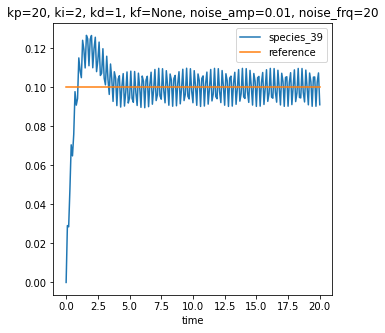

In [51]:
cl_opts=dict(kp=20, ki=2, kd=1, kf=None, noise_amp=0.01, noise_frq=20)
sim_opts = dict(end_time=20, step_size=.1)
ctlsb = ctl.ControlSBML(BIOMD, input_names=[INPUT], output_names=[OUTPUT])
ts = evaluateClosedLoopSystem(ctlsb, cl_opts=cl_opts, sim_opts=sim_opts, 
                              is_plot=True)

The above poles indicate that the system is unstable. There were positive poles present in each design interation for this control system. Despite this, I still selected these kp,ki, and kd values as they align with my control objectives. Ideally all of my poles would be negative and not have an imaginary component, however, perhaps this is a system/model that is inherrently unstable. 

**COMMENTS**
* I played with your system a bit (e.g., above), and I agree that it's surprisingly difficult to come up with a design.

# 4. Evaluate the Design
You will construct a simulation testbed in which the SBML model is regulated by your control architecture. You should evaluate the effects of disturbances and/or noise.

OK!


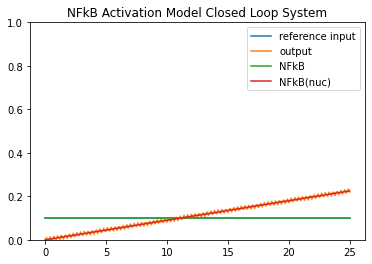

In [17]:
def evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=0, ki=0, kd=0, kf=-0.0001, noise_amp=0, noise_freq=0, title="NFkB Activation Model Closed Loop System"):
  '''
  Evaluates the control design of a closed loop system in the form of 
  a plot of the step response of the system to a change in the reference
  input. Evaluate effect of 

  Parameters
  ----------
  model: str
        System under control
  input_name: str
  output_name: str
  kp: float
  ki: float
  kd: float
  kf: float
  noise_amp: float
    amplitude of noise
  noise_freq: float
    frequency of noise
  title: string

  Returns
  -------
  closed_loop: control.InterconnectedSystem

  '''
  # PID parameters

  # Creating the closed loop system elements
  factory = ctl.IOSystemFactory()
  ctlsb = ctl.ControlSBML(model, input_names=[input_name], output_names=[output_name])
  system = ctlsb.makeNonlinearIOSystem("system")
  controller = factory.makePIDController("controller", kp=kp, ki=ki, kd=kd)
  sum_Y_N = factory.makeAdder("sum_Y_N")
  sum_R_F = factory.makeAdder("sum_R_F")
  sum_U_D = factory.makeAdder("sum_U_D")

  fltr = factory.makeFilter("fltr", kf)
  noise = factory.makeSinusoid("noise", noise_amp, noise_freq)
  disturbance = factory.makeSinusoid("disturbance", 0, 0)

  

  # Creating the closed loop system test bed

  # Create the closed loop system
  system_in = "system.%s" % input_name
  system_out = "system.%s" % output_name
  
  closed_loop = control.interconnect(
    [noise, sum_Y_N, sum_R_F, system, fltr, controller ], 
    connections=[
      ['controller.in', 'sum_R_F.out'],    # e(t)
      ['system.species_31',   'controller.out'],   # u(t)
      ['sum_Y_N.in1', 'system.species_39'],
      ['sum_Y_N.in2', 'noise.out'],
      ['fltr.in', 'sum_Y_N.out'],
      ['sum_R_F.in1', 'fltr.out'],  #['sum_R_F.in2', "-" + system_out],
    ],
    inplist=["sum_R_F.in2"],
    outlist=["sum_R_F.in2", 'sum_Y_N.out', 'system.species_31', 'system.species_39'],
  )

  # make state vector
  X0 = ctl.makeStateVector(closed_loop)

  # run simulation and plot
  times = ctl.makeSimulationTimes(start_time=0, end_time=25, points_per_time=10)
  # Need the initial state
  result = control.input_output_response(closed_loop, T=times, U=.1, X0=X0)
  #for s in range(len(ctlsb.state_names)):
  plt.plot(result.t, result.outputs[0].flatten())
  plt.plot(result.t, result.outputs[1].flatten())
  plt.plot(result.t, result.outputs[2].flatten())
  plt.plot(result.t, result.outputs[3].flatten())
  legends = ["reference input", "output", 'NFkB', 'NFkB(nuc)']
  plt.legend(legends) 
  plt.ylim(0,1)
  plt.title(title)

  return closed_loop  
        
# Tests
inter_sys = evaluateDesign (model=BIOMD, input_name='species_31', output_name='species_39', kp=1, ki=0, kd=0, kf=0, noise_amp=0.01, noise_freq=20)
assert type(inter_sys), control.iosys.InterconnectedSystem
print('OK!')

Here is my selected SBML model is regulated by my control architecture. Here I will use the function evaluateDesign, to evaluate the effects of noise

**Noise Frequency: 20
   Noise Amplitude: 0.01**




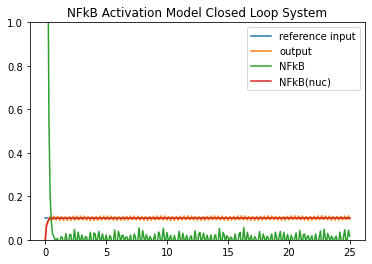

In [18]:
inter_sys = evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=.005, ki=.00000001, kd=11, kf=-.0001, noise_amp=0.01, noise_freq=20)


**Noise Frequency: 50
   Noise Amplitude: 0.01**

Increasing the noise frequency to 50 does not affect the setting of control output of NFkB(nuc)

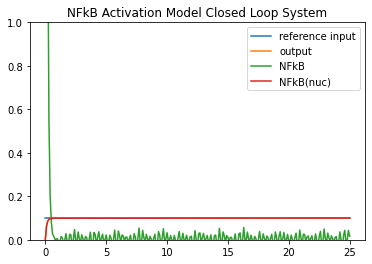

In [19]:
inter_sys = evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=.005, ki=.00000001, kd=11, kf=-.0001, noise_amp=0.01, noise_freq=0)



**Noise Frequency: 10
   Noise Amplitude: 0.01**

Decreasing the noise frequency to 10 does not affect the setting of control output of NFkB(nuc)

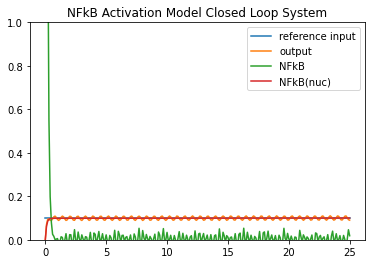

In [20]:
inter_sys = evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=.005, ki=.00000001, kd=11, kf=-.0001, noise_amp=0.01, noise_freq=10)



**Noise Frequency: 20
   Noise Amplitude: 0.1**

Increasing the noise amplitude to 0.1 does not affect the setting of control output of NFkB(nuc), but does visibly affect the amount of noise present

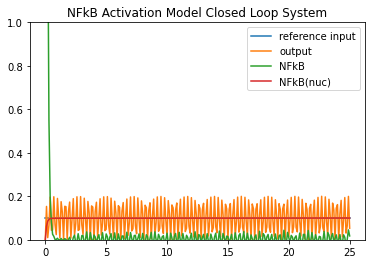

In [21]:
inter_sys = evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=.005, ki=.00000001, kd=11, kf=-.0001, noise_amp=0.1, noise_freq=20)


**Noise Frequency: 20
   Noise Amplitude: 0.1
   Kf: -0.01**

To try and attenuate the effect of noise on the control output, I increased the magnitude of kf by two orders of magnitude. This unfortunately caused the control output to begin deviating from the reference of 0.1. 

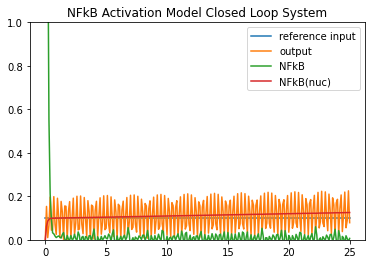

In [22]:
inter_sys = evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=.005, ki=.00000001, kd=11, kf=-.01, noise_amp=0.1, noise_freq=20)


# 5. Discuss Trade-offs



In designing my final control system, there were many trade-offs. **My final PID parameter values were: kp = 0.005, ki = 0.00000001, kd = 11.** Determining a proper kp value was difficult because for values that were too small, the control output remained near zero and never reached the reference of 0.1. kp values that were too high caused the output to overshoot the reference. I found that my model was most sensitive to ki values, and was severly unstable when the ki values were too high and would overshoot the reference. This is the smallest parameter by several orders of magnitude. As a result, my control system was essentially a PD controller whcih are high pass filters and thus unable to properly attenuate noise. While it was unfortuante that the system could not attenuate noise, increasing the frequency of noise did not seem to affect the control output and therefore i determined that it was more important to keep a low ki value and prevent the system from overshooting the reference. Lastly, the kd value had a significant impact on the final settling value. Adjusting the kd seemed to shift the output stead state up and down. I found that kd = 11 resulted in my system settling right at the reference output of 0.1.

This system was fairly finicky, which was refelcted in the tranfer functions and particularly the poles. Many of the poles were still positive and had imaginary componenents. These were impossible to eliminate, especially with noise injected into the system. However, eliminating parameter combinations that caused the system to overshoot seemed to improve the stability of the system as judged by the decrese in the numer and/or maginute of positive poles. 

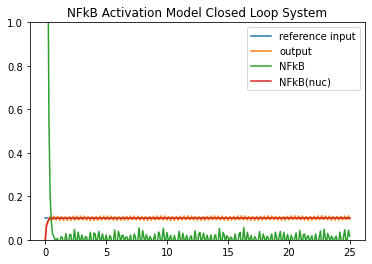

In [23]:
inter_sys = evaluateDesign (model=BIOMD, input_name=INPUT, output_name=OUTPUT, kp=.005, ki=.00000001, kd=11, kf=-.0001, noise_amp=0.01, noise_freq=20)


In [24]:
evaluatePoles(BIOMD, 10, 0.005, 0.00000001, 11)

array([-3.56326345e-01+0.00000000e+00j, -3.48046886e-01+5.44198058e-02j,
       -3.48046886e-01-5.44198058e-02j, -3.24458471e-01+1.07234041e-01j,
       -3.24458471e-01-1.07234041e-01j, -2.88654231e-01+1.56011376e-01j,
       -2.88654231e-01-1.56011376e-01j, -2.43893114e-01+1.97730301e-01j,
       -2.43893114e-01-1.97730301e-01j, -1.92911625e-01+2.30237074e-01j,
       -1.92911625e-01-2.30237074e-01j, -1.37797152e-01+2.52864877e-01j,
       -1.37797152e-01-2.52864877e-01j, -2.41081018e-01+0.00000000e+00j,
       -7.95706438e-02+2.65367105e-01j, -7.95706438e-02-2.65367105e-01j,
       -1.93180534e-02+2.66470137e-01j, -1.93180534e-02-2.66470137e-01j,
        4.03125495e-02+2.54626564e-01j,  4.03125495e-02-2.54626564e-01j,
        9.56018524e-02+2.29455888e-01j,  9.56018524e-02-2.29455888e-01j,
        1.42787499e-01+1.92090433e-01j,  1.42787499e-01-1.92090433e-01j,
        1.78560474e-01+1.45016222e-01j,  1.78560474e-01-1.45016222e-01j,
        2.00369659e-01+9.19297311e-02j,  2.00369659

In [25]:
  kp=.005; ki=.00000001; kd=11
  Gs = ctlsb.makeTransferFunction(time=10)
  Cs = control.TransferFunction([kp],[1]) + control.TransferFunction([ki], [1,0]) + control.TransferFunction([kd, 0],[1])

  HRY = (Gs*Cs) / (1 + Gs*Cs)
  HRY

TransferFunction(array([ 9.90000000e-001,  2.02852703e+000,  1.92191955e+000,
        1.12370978e+000,  4.56935314e-001,  1.38158810e-001,
        3.24404905e-002,  6.10030526e-003,  9.40120976e-004,
        1.20880736e-004,  1.31539318e-005,  1.22541498e-006,
        9.86590900e-008,  6.91828617e-009,  4.25275328e-010,
        2.30397751e-011,  1.10496580e-012,  4.70832758e-014,
        1.78780371e-015,  6.06365320e-017,  1.84035067e-018,
        5.00487266e-020,  1.22063205e-021,  2.67089713e-023,
        5.24330928e-025,  9.23082813e-027,  1.45608744e-028,
        2.05531665e-030,  2.59146945e-032,  2.91209879e-034,
        2.90831953e-036,  2.57265056e-038,  2.00753397e-040,
        1.37533252e-042,  8.22566259e-045,  4.26674238e-047,
        1.90487011e-049,  7.25518902e-052,  2.33389132e-054,
        6.27025519e-057,  1.39001670e-059,  2.51210377e-062,
        3.66255108e-065,  4.27988140e-068,  4.00719904e-071,
        3.02430229e-074,  1.85893637e-077,  9.41055772e-081,
       

# References

[1]  Sharp, G. C., Ma, H., Saunders, P. T., & Norman, J. E. (2013). A computational model of lipopolysaccharide-induced nuclear factor kappa B activation: a key signalling pathway in infection-induced preterm labour. PloS one, 8(7), e70180. https://doi.org/10.1371/journal.pone.0070180

# Thank you for a great quarter!